In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\polynomial_like_dataset.csv")
df.head()

,X,Y,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [63]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [65]:
X

array([[-0.11166654,  0.52022374],
       [ 1.14264982, -0.34257734],
       [ 0.79555796, -0.01144231],
       ...,
       [ 1.72760808, -0.42882943],
       [-1.01448644,  0.13522904],
       [ 0.77438101,  0.63428493]])

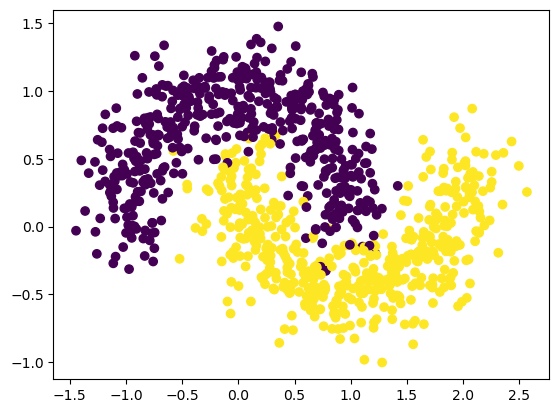

In [67]:
plt.scatter(X[:,0],X[:,1],c=y)

In [68]:
from sklearn.linear_model import LogisticRegression 
clf=LogisticRegression()

In [71]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

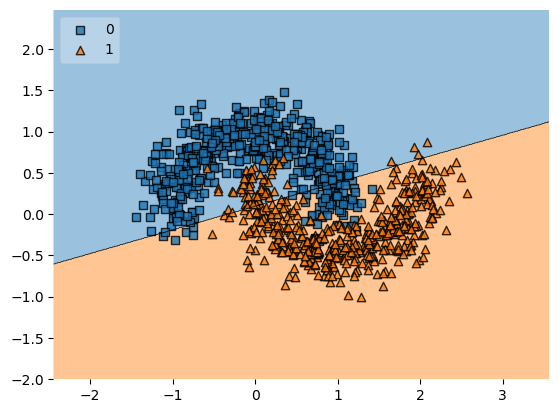

In [73]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y.astype('int'),clf,legend=2)

In [74]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.867

In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
X_trf=poly.fit_transform(X)

In [85]:
clf1=LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9629999999999999

In [93]:
def plot_decision_boundary(X,y,degree=1):
    poly=PolynomialFeatures(degree=degree)
    X_trf=poly.fit_transform(X)

    clf=LogisticRegression()
    clf.fit(X_trf,y)

    accuracy=np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step=0.01)
    b=np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step=0.01)

    XX,YY=np.meshgrid(a,b)
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.title('Degree {}, accuracy is{} '.format(degree,np.round(accuracy,4)))
    

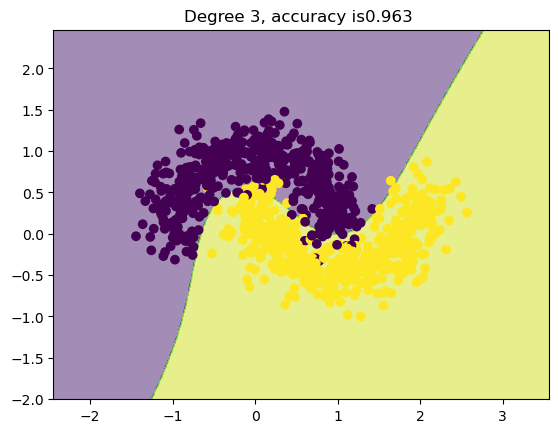

In [101]:
plot_decision_boundary(X,y,3)